In [1]:
#1.Compute Normalized Error

import numpy as np
import matplotlib.pyplot as plt

def norm_error(x,x_):
    error=np.linalg.norm(x-x_,2)/np.linalg.norm(x,2)
    return error

In [2]:
#2.Experimental Setup

import scipy
from scipy.sparse import coo_matrix
import random

def generateA(m,n):
    randmat=np.mat(np.random.randn(m,n))
    randmat=randmat/np.linalg.norm(randmat,2)
    return randmat

def generateX(n,s):
    arr=18*np.random.rand(s)-9
    for i in arr:
        if i<=0:
            i=i-1
        else:
            i=i+1
    row=random.sample(range(n),s)
    col=[0]*s
    X=coo_matrix((arr,(row,col)),shape=(n,1))
    X=X.todense()
    return X

def generateN(m,sd):
    N=np.random.normal(0,sd,(m,1))
    return N

In [ ]:
#3.Noiseless case(20)

def omp(y,A):
    r=y
    N=A.shape[1]
    index=np.zeros(N)
    result=np.zeros((N,1))
    while 1:
        product=np.fabs(np.dot(A.T,r))
        pos=np.argmax(product)
        index[pos]=1
        pi=np.linalg.pinv(A[:,index>0])
        a=np.dot(pi,y)
        r=y-np.dot(A[:,index>0],a)
        if np.linalg.norm(r)<0.01:
            break
    result[index>0]=a
    S=np.where(index>0)
    return  result,S

def ESR(a,b):
    count=0
    c=np.where(a!=0)[0]
    for i in b:
        if i in c:
           count=count+1 
    return count/len(c)

N=20#20,50,100
M=N-1
K=1000
s_max=int(N/2)
error_average=np.zeros(shape=(M,s_max))
esr_average=np.zeros(shape=(M,s_max))
for m in range(1,M+1):
    for s in range(1,s_max+1):
        error_sum=0
        esr_sum=0
        for _ in range(K):
            A=generateA(m,N)
            X=generateX(N,s)
            Y=A*X
            result=omp(Y,A)
            X_=result[0]
            S=result[1][0]
            error_sum=error_sum+norm_error(X,X_)
            esr_sum=esr_sum+ESR(X,S)
        error_average[m-1][s-1]=error_sum/K
        esr_average[m-1][s-1]=esr_sum/K
    print(m)

plt.matshow(esr_average)
plt.title('Noiseless Phase Transition,ESR,{}'.format(N))
plt.colorbar()
plt.ylabel('Measurement')
plt.xlabel('S')
plt.show()
plt.matshow(error_average)
plt.title('Noiseless Phase Transition,Error,{}'.format(N))
plt.colorbar()
plt.ylabel('Measurement')
plt.xlabel('S')
plt.show()


In [ ]:
#4.(a)

def omp_n1(y,A,s_gt):
    r=y
    N=A.shape[1]
    index=np.zeros(N)
    result=np.zeros((N,1))
    while 1:
        product=np.fabs(np.dot(A.T,r))
        pos=np.argmax(product)
        index[pos]=1
        pi=np.linalg.pinv(A[:,index>0])
        a=np.dot(pi,y)
        r=y-np.dot(A[:,index>0],a)
        #print(np.where(index>0)[0])
        if len(np.where(index>0)[0])==s_gt:
            break
    result[index>0]=a
    return  result

N=20#20,50,100
M=N-1
K=1000
s=int(N/2)
sd=np.array([0.0001,0.001])
s_rate=np.zeros(shape=(M-s,2))
for m in range(s,M+1):
    for sd_ in range(len(sd)):
        s_sum=0
        for _ in range(K):
            A=generateA(m,N)
            X=generateX(N,s)
            noise=generateN(m,sd[sd_])
            Y=A*X+noise
            result=omp_n1(Y,A,s)
            X_=result
            if norm_error(X,X_)<=0.001:
                s_sum=s_sum+1
        s_rate[m-s-1][sd_]=s_sum/K
    print(m)

plt.matshow(s_rate.T)
plt.title('Noisy Phase Transition,Success Rate,Known Sparsity')
plt.colorbar()
plt.xlabel('Measurement')
plt.ylabel('SD')
plt.show()

In [ ]:
#4.(b)

def omp_n2(y,A,n_norm):
    r=y
    N=A.shape[1]
    index=np.zeros(N)
    result=np.zeros((N,1))
    while 1:
        product=np.fabs(np.dot(A.T,r))
        pos=np.argmax(product)
        index[pos]=1
        pi=np.linalg.pinv(A[:,index>0])
        a=np.dot(pi,y)
        r=y-np.dot(A[:,index>0],a)
        if np.linalg.norm(r)<=n_norm:
            break
    result[index>0]=a
    return  result

N=20#20,50,100
M=N-1
K=1000
s=int(N/2)
sd=np.array([0.0001,0.001])
s_rate=np.zeros(shape=(M-s,2))
for m in range(s,M+1):
    for sd_ in range(len(sd)):
        s_sum=0
        for _ in range(K):
            A=generateA(m,N)
            X=generateX(N,s)
            noise=generateN(m,sd[sd_])
            Y=A*X+noise
            noise_norm=np.linalg.norm(noise)
            result=omp_n2(Y,A,noise_norm)
            X_=result
            if norm_error(X,X_)<=0.001:
                s_sum=s_sum+1
        s_rate[m-s-1][sd_]=s_sum/K
    print(m)

plt.matshow(s_rate.T)
plt.title('Noisy Phase Transition,Success Rate,Known NormNoise')
plt.colorbar()
plt.xlabel('Measurement')
plt.ylabel('SD')
plt.show()

In [6]:
#5.(a)
import scipy.io as io
data=io.loadmat("Y1 Y2 Y3 and A1 A2 A3 .mat")
A1=data['A1']
A2=data['A2']
A3=data['A3']
Y1=data['y1']
Y2=data['y2']
Y3=data['y3']
M1=(A1.shape)[0]
M2=(A2.shape)[0]
M3=(A3.shape)[0]

In [ ]:
#5.(b)
X1=omp(Y1,A1)
X2=omp(Y2,A2)
X3=omp(Y3,A3)
X1_im=np.reshape(X1[0],(160,90))
X2_im=np.reshape(X2[0],(160,90))
X3_im=np.reshape(X3[0],(160,90))

plt.matshow(X1_im.T)
plt.show()
plt.matshow(X2_im.T)
plt.show()
plt.matshow(X3_im.T)
plt.show()

[X1]: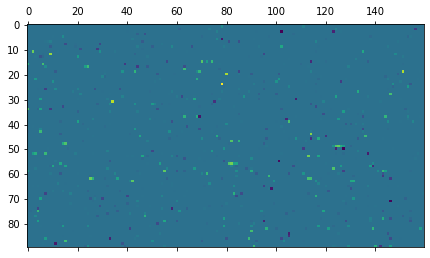

[X1]: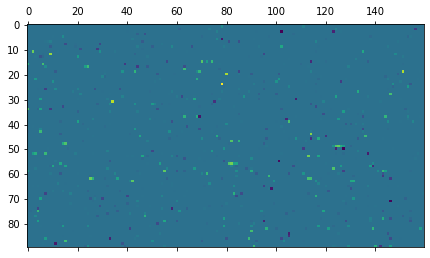